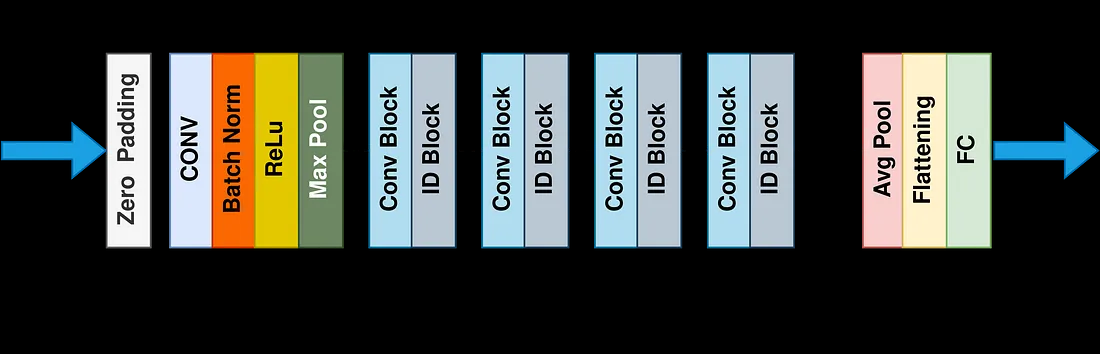

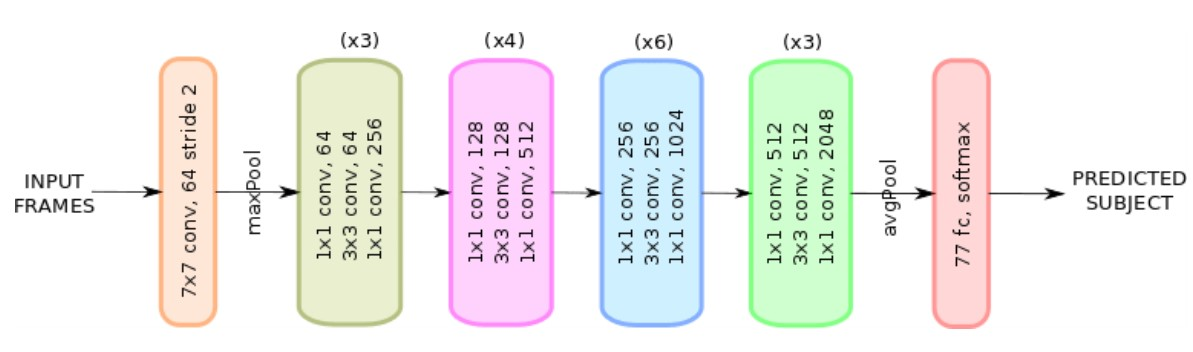

In [1]:
from keras.models import Model
from keras.utils import plot_model

In [2]:
from keras.initializers import glorot_uniform
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D


In [3]:
def convolutional_block(X, filters, s = 2):
    
    # Retrieve Filters
    F1, F2, F3 = filters
    
    # Save the input value
    X_shortcut = X

    # First layer 
    X = Conv2D(F1, (1, 1), strides = (s,s))(X) # 1,1 is filter size
    X = BatchNormalization(axis = 3)(X)  # normalization on channels
    X = Activation('relu')(X)

      
    # Second layer  
    X = Conv2D(filters = F2, kernel_size = (3, 3), strides = (1,1), padding = 'same')(X)
    X = BatchNormalization(axis = 3)(X)
    X = Activation('relu')(X)


    # Third layer
    X = Conv2D(filters = F3, kernel_size = (1, 1), strides = (1,1), padding = 'valid')(X)
    X = BatchNormalization(axis = 3)(X)


    ##### SHORTCUT PATH #### 
    X_shortcut = Conv2D(filters = F3, kernel_size = (1, 1), strides = (s,s), padding = 'valid')(X_shortcut)
    X_shortcut = BatchNormalization(axis = 3)(X_shortcut)

    # Final step: Add shortcut value here, and pass it through a RELU activation 
    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)
    
    
    return X

In [4]:
def identity_block(X, filters):

    # Retrieve Filters
    F1, F2, F3 = filters
    
    # Saving the input value.we need this later to add to the output. 
    X_shortcut = X
    
    X = Conv2D(filters = F1, kernel_size = (1, 1), strides = (1,1), padding = 'valid')(X)
    X = BatchNormalization(axis = 3)(X)
    X = Activation('relu')(X)

    X = Conv2D(filters = F2, kernel_size = (3, 3), strides = (1,1), padding = 'same')(X)
    X = BatchNormalization(axis = 3)(X)
    X = Activation('relu')(X)

    X = Conv2D(filters = F3, kernel_size = (1, 1), strides = (1,1), padding = 'valid')(X)
    X = BatchNormalization(axis = 3)(X)

    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)
    
    
    return X


In [5]:
# def ResNet50(input_shape=(224, 224, 3), classes = 1000):
def ResNet50(input_shape=(224, 224, 3), classes = 10):


  X_input = Input(input_shape)

  X = ZeroPadding2D((3, 3))(X_input) #3,3 padding

  X = Conv2D(64, (7, 7), strides=(2, 2), name='conv1')(X) 
  X = BatchNormalization(axis=3, name='bn_conv1')(X)
  X = Activation('relu')(X)
  X = MaxPooling2D((3, 3), strides=(2, 2))(X)

  ## 1st 3_layers
  X = convolutional_block(X, filters=[64, 64, 256], s = 1)
  X = identity_block(X,  filters = [64, 64, 256])
  X = identity_block(X,  filters = [64, 64, 256])

  ## 2nd 4_layers
  X = convolutional_block(X,  filters = [128, 128, 512], s = 2)
  X = identity_block(X, [128, 128, 512])
  X = identity_block(X, [128, 128, 512])
  X = identity_block(X, [128, 128, 512])

  
  ## 3rd 6_layers
  X = convolutional_block(X, filters = [256, 256, 1024], s = 2)
  X = identity_block(X, [256, 256, 1024])
  X = identity_block(X, [256, 256, 1024])
  X = identity_block(X, [256, 256, 1024])
  X = identity_block(X, [256, 256, 1024])
  X = identity_block(X, [256, 256, 1024])

  ## 1st 3_layers
  X = convolutional_block(X, filters=[512, 512, 2048], s = 2)
  X = identity_block(X, filters = [512, 512, 2048])
  X = identity_block(X, filters = [512, 512, 2048])

  # AVGPOOL 
  X = AveragePooling2D((2,2))(X)


  # output layer
  X = Flatten()(X)
  X = Dense(classes, activation='softmax',  kernel_initializer = glorot_uniform(seed=0))(X)
    
    
  # Create model
  model = Model(inputs = X_input, outputs = X, name='ResNet50')

  return model






  

  



In [6]:
model = ResNet50(input_shape = (224, 224, 3), classes = 10)

In [7]:
model.summary()

Model: "ResNet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv1 (Conv2D)                 (None, 112, 112, 64  9472        ['zero_padding2d[0][0]']         
                                )                                                                 
                                                                                           

In [8]:
plot_model(model, show_shapes = True, show_layer_names = True, show_layer_activations = True)

Output hidden; open in https://colab.research.google.com to view.

In [9]:
import tensorflow as tf
print(tf.test.gpu_device_name())


/device:GPU:0


In [10]:
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

In [11]:
(x_train, y_train),(x_test, y_test) = cifar10.load_data()


170498071/170498071 [==============================] - 2s 0us/step


In [12]:
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


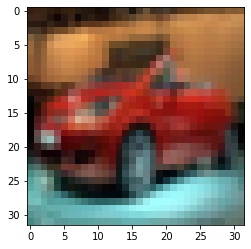

In [13]:
plt.imshow(x_train[45]);


In [14]:
## normalize data by divide by 255
x_train = x_train / 255
x_test = x_test / 255

In [15]:
x_train =x_train[:7000]
x_test =x_test[:2000]
print(x_train.shape)
print(x_test.shape)

(7000, 32, 32, 3)
(2000, 32, 32, 3)


In [16]:
from tensorflow.keras.utils import to_categorical


In [17]:
y_cat_train = to_categorical(y_train[:7000], num_classes=10)
y_cat_test = to_categorical(y_test[:2000], num_classes=10)

In [18]:
print(y_cat_train.shape)
print(y_cat_test.shape)

(7000, 10)
(2000, 10)


* With **`preserve_aspect_ratio=True`**, the aspect ratio is preserved, so size is the maximum for each dimension

In [19]:
x_train = tf.image.resize(x_train, [224, 224], preserve_aspect_ratio=True)

In [20]:
x_test = tf.image.resize(x_test, [224, 224], preserve_aspect_ratio=True)


In [21]:
print(x_train.shape)
print(x_test.shape)

(7000, 224, 224, 3)
(2000, 224, 224, 3)


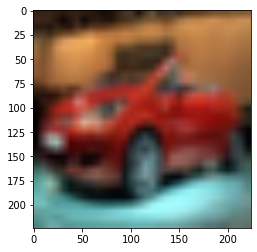

In [22]:
plt.imshow(x_train[45]);


In [23]:
model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate = 0.001),
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

In [24]:
model.fit(x_train,
          y_cat_train,
          epochs = 5,
          batch_size = 32,
          verbose = 1,
          validation_data = (x_test, y_cat_test))

Epoch 1/5
219/219 [==============================] - 125s 358ms/step - loss: 3.2230 - accuracy: 0.2550 - val_loss: 3.3949 - val_accuracy: 0.1090
Epoch 2/5
219/219 [==============================] - 81s 369ms/step - loss: 1.6650 - accuracy: 0.3956 - val_loss: 1.9228 - val_accuracy: 0.3265
Epoch 3/5
219/219 [==============================] - 81s 369ms/step - loss: 1.5191 - accuracy: 0.4463 - val_loss: 1.6251 - val_accuracy: 0.3945
Epoch 4/5
219/219 [==============================] - 81s 368ms/step - loss: 1.4119 - accuracy: 0.4874 - val_loss: 1.5160 - val_accuracy: 0.4510
Epoch 5/5
219/219 [==============================] - 81s 369ms/step - loss: 1.3036 - accuracy: 0.5323 - val_loss: 1.4346 - val_accuracy: 0.4695


In [25]:
import pandas as pd
df = pd.DataFrame(model.history.history)

In [26]:
df.head()

,loss,accuracy,val_loss,val_accuracy
0,3.223003,0.255000,3.394899,0.1090
1,1.665046,0.395571,1.922765,0.3265
2,1.519095,0.446286,1.625107,0.3945
3,1.411858,0.487429,1.515975,0.4510
4,1.303597,0.532286,1.434559,0.4695


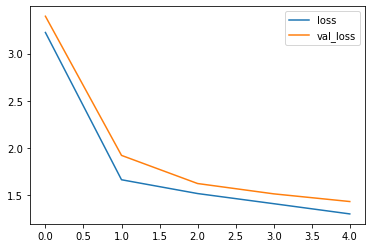

In [27]:
df[['loss', 'val_loss']].plot();


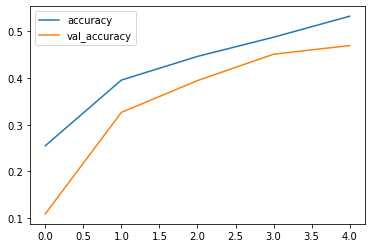

In [28]:
df[['accuracy', 'val_accuracy']].plot();
